In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
import mnist as reader
import random
from keras.utils import to_categorical

In [4]:
import tensorflow as tf

# Load the Fashion-MNIST dataset
(x_train, train_labels), (x_test, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
batch_size = 3
img_height = 28
img_width = 28

In [6]:
print("Shape of the Training Image Data: " +str(x_train.shape))
print("Shape of the Training Class Data: " +str(train_labels.shape))
print("Shape of the Test Image Data: " +str(x_test.shape))
print("Shape of the Test Class Data: " +str(test_labels.shape))

Shape of the Training Image Data: (60000, 28, 28)
Shape of the Training Class Data: (60000,)
Shape of the Test Image Data: (10000, 28, 28)
Shape of the Test Class Data: (10000,)


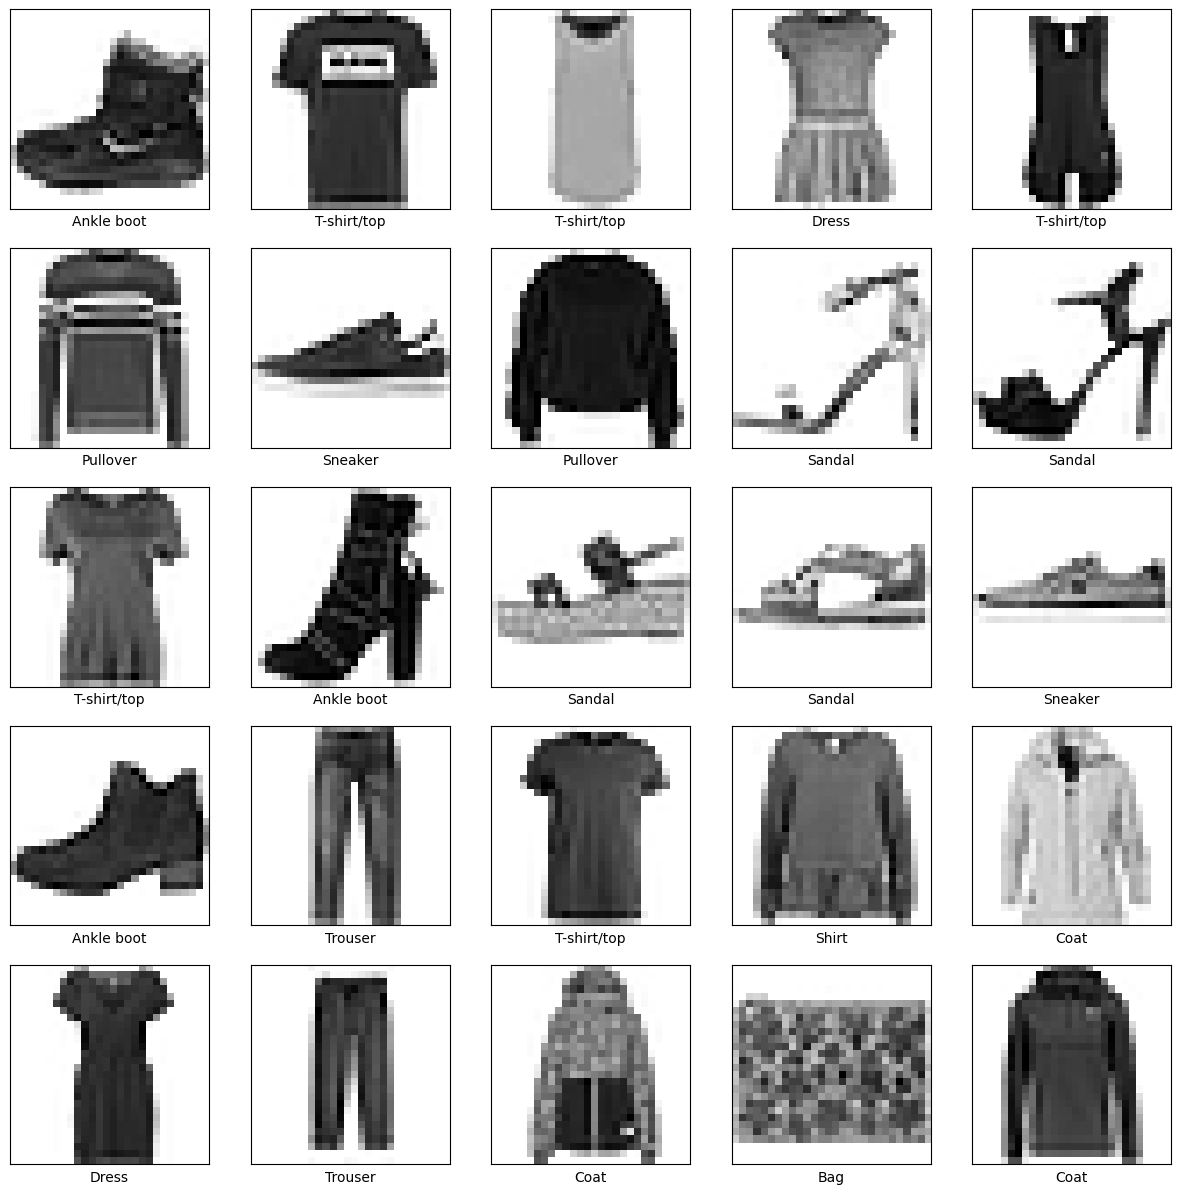

In [7]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])
plt.show()    

In [8]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='valid',
        activation='relu',
        input_shape=(28,28,1)       
    )
)

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

model.add(
    tf.keras.layers.Dense(
        units=10,
        activation='softmax'
    )

)

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

C:\Users\SINDH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

history = model.fit(
    x_train,train_labels,
    batch_size = 256,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.7275 - loss: 0.7876 - val_accuracy: 0.8494 - val_loss: 0.4223
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.8658 - loss: 0.3828 - val_accuracy: 0.8853 - val_loss: 0.3362
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - accuracy: 0.8852 - loss: 0.3217 - val_accuracy: 0.8823 - val_loss: 0.3214
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 148ms/step - accuracy: 0.8955 - loss: 0.2928 - val_accuracy: 0.8925 - val_loss: 0.2995
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 153ms/step - accuracy: 0.9013 - loss: 0.2747 - val_accuracy: 0.8970 - val_loss: 0.2823
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - accuracy: 0.9071 - loss: 0.2629 - val_accuracy: 0.9057 - val_loss: 0.2658
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 161ms/step - accuracy: 0.9122 - loss: 0.2379 - val_accuracy: 0.9009 - val_loss: 0.2737
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - accuracy: 0.9149 - loss: 0

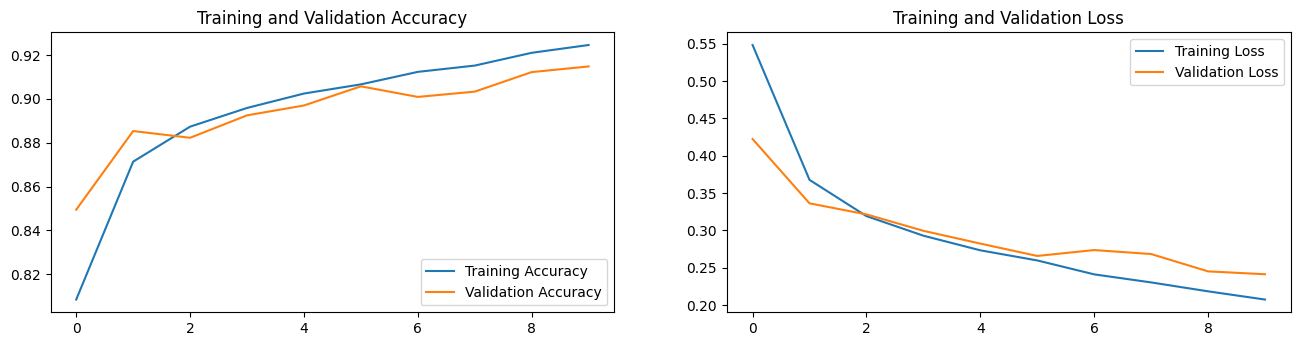

In [10]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(label_names[predicted_label],
                                100*np.max(predictions_array),
                                label_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

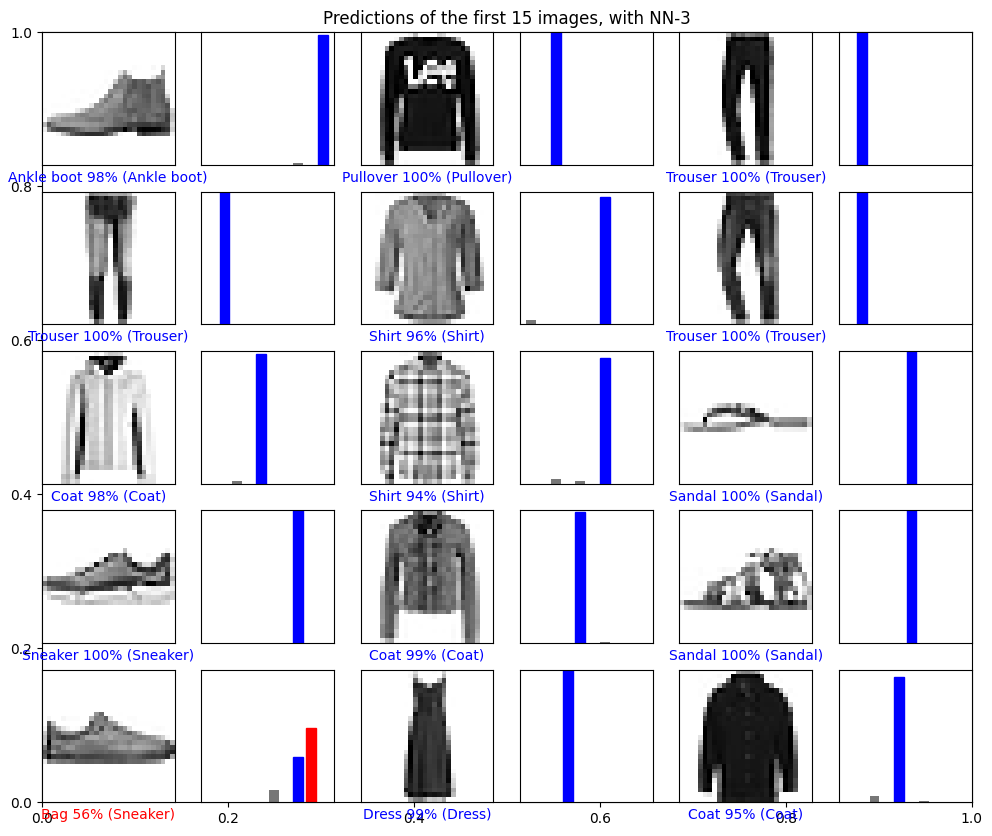

In [13]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

## <h3>Neural Networks with different number of layers<h3>

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model a simple 3-layer neural network
nn_model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
nn_model_1.summary()

C:\Users\SINDH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
nn_model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
history_1 = nn_model_1.fit(x_train, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7696 - loss: 0.6623 - val_accuracy: 0.8527 - val_loss: 0.4189
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8580 - loss: 0.3953 - val_accuracy: 0.8641 - val_loss: 0.3725
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8739 - loss: 0.3451 - val_accuracy: 0.8726 - val_loss: 0.3501
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8808 - loss: 0.3284 - val_accuracy: 0.8775 - val_loss: 0.3413
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8896 - loss: 0.3000 - val_accuracy: 0.8703 - val_loss: 0.3562


In [16]:
test_loss_1, test_acc_1 = nn_model_1.evaluate(x_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8723 - loss: 0.3567


In [17]:
# Model a simple 6-layer neural network 
nn_model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
nn_model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = nn_model_2.fit(x_train, train_labels, epochs=5, validation_split=0.2)
test_loss_2, test_acc_2 = nn_model_2.evaluate(x_test, test_labels)
print("Neural Network Model - 2 layers - test loss:", test_loss_2 * 100)
print("Neural Network Model - 2 layers - test accuracy:", test_acc_2 * 100)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7539 - loss: 0.6777 - val_accuracy: 0.8275 - val_loss: 0.4796
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8583 - loss: 0.3863 - val_accuracy: 0.8585 - val_loss: 0.3946
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8696 - loss: 0.3440 - val_accuracy: 0.8733 - val_loss: 0.3516
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8806 - loss: 0.3195 - val_accuracy: 0.8687 - val_loss: 0.3678
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8869 - loss: 0.3024 - val_accuracy: 0.8756 - val_loss: 0.3430
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.3736
Neural Network Model - 2 layers - test loss: 37.79761791229248
Neural Network Model - 2 layers - test accuracy: 86.41999959945679


In [18]:
# Model a simple 12-layer neural network 
nn_model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
nn_model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_3 = nn_model_3.fit(x_train, train_labels, epochs=5, validation_split=0.2)
test_loss_3, test_acc_3 = nn_model_2.evaluate(x_test, test_labels)
print("Neural Network Model - 3 layers - test loss:", test_loss_3 * 100)
print("Neural Network Model - 3 layers - test accuracy:", test_acc_3 * 100)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6984 - loss: 0.7984 - val_accuracy: 0.8446 - val_loss: 0.4318
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8396 - loss: 0.4468 - val_accuracy: 0.8493 - val_loss: 0.4266
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8576 - loss: 0.4067 - val_accuracy: 0.8588 - val_loss: 0.4045
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8734 - loss: 0.3666 - val_accuracy: 0.8664 - val_loss: 0.3877
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8748 - loss: 0.3556 - val_accuracy: 0.8482 - val_loss: 0.4425
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.3736
Neural Network Model - 3 layers - test loss: 37.79761791229248
Neural Network Model - 3 layers - test accuracy: 86.41999959945679


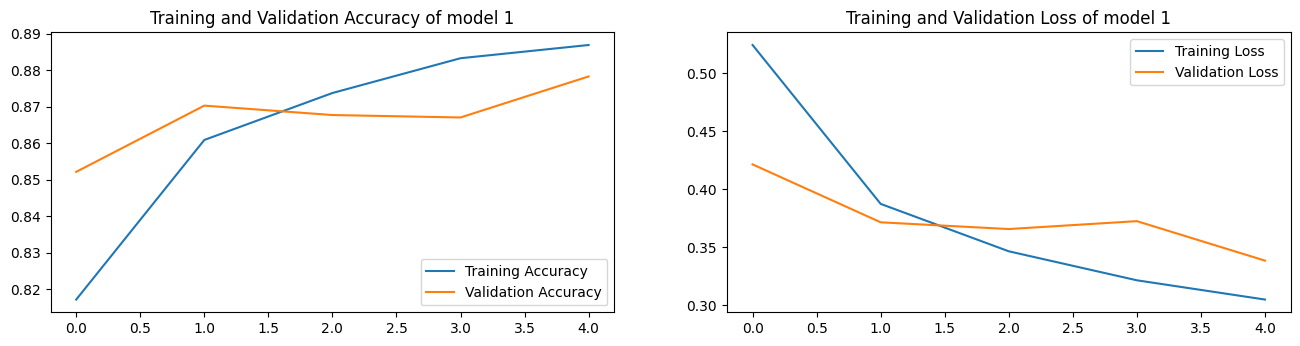

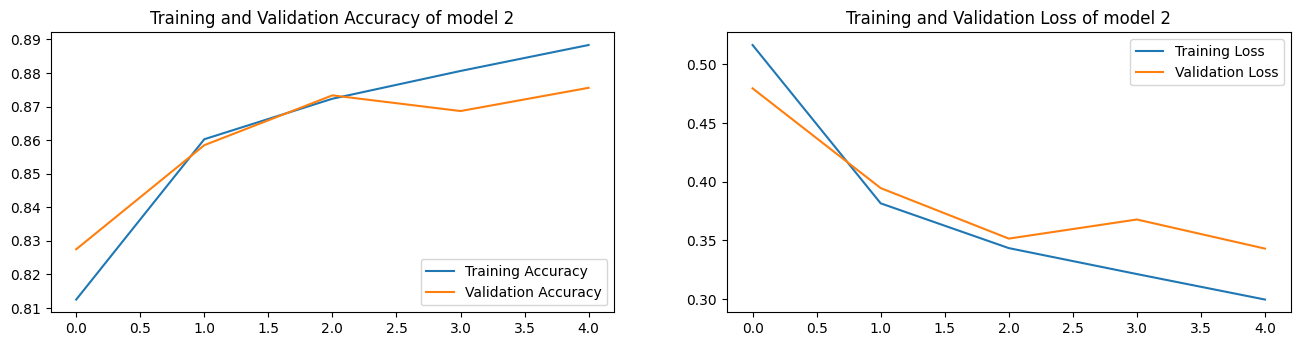

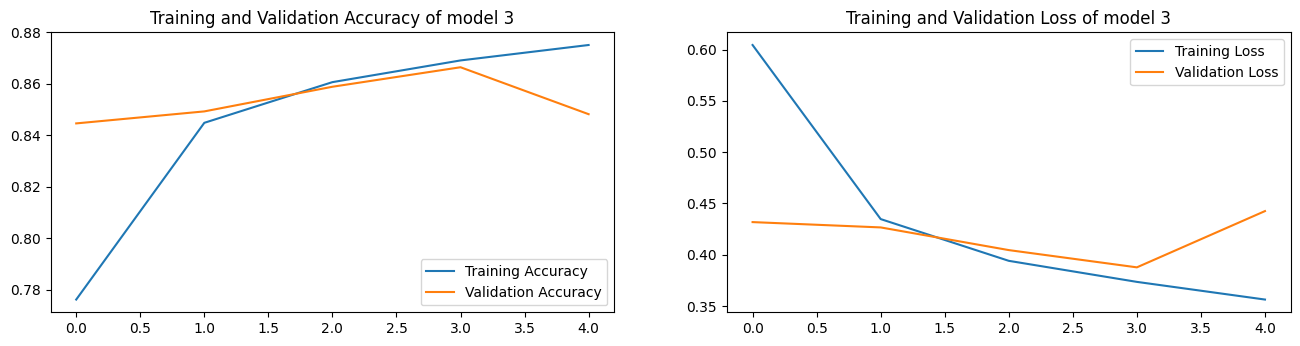

In [19]:
epochs = 5
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

acc_3 = history_3.history['accuracy']
val_acc_3 = history_3.history['val_accuracy']

loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of model 1')

plt.subplot(2,2,2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss of model 1')
plt.show()


plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of model 2')

plt.subplot(2,2,2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss of model 2')
plt.show()


plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(epochs_range, acc_3, label='Training Accuracy')
plt.plot(epochs_range, val_acc_3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of model 3')

plt.subplot(2,2,2)
plt.plot(epochs_range, loss_3, label='Training Loss')
plt.plot(epochs_range, val_loss_3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss of model 3')
plt.show()

In [20]:
predictions = nn_model_3.predict(x_test)
predictions.shape #(10000, 10)
score = tf.nn.softmax(predictions[9])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(test_labels[np.argmax(score)], 100 * np.max(score)))
predictions[9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
This image most likely belongs to 6 with a 22.56 percent confidence.


array([5.2651188e-08, 5.6883107e-07, 1.7429919e-07, 1.7995557e-06,
       3.5678362e-08, 1.3019234e-02, 3.9204770e-07, 9.6729201e-01,
       2.2306084e-04, 1.9462584e-02], dtype=float32)

In [21]:
np.argmax(predictions[7])

6

In [22]:
label_names[6]

'Shirt'

In [23]:
#Ankle boot has the highest confidence value 
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(label_names[predicted_label],
                                100*np.max(predictions_array),
                                label_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

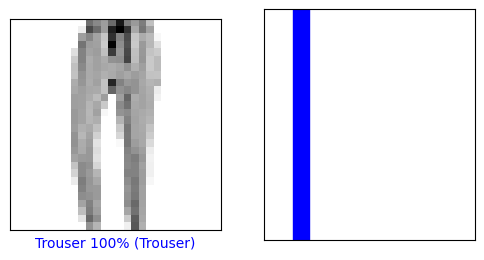

In [25]:
# look at 0th image, predictions, prediction array
i=80
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

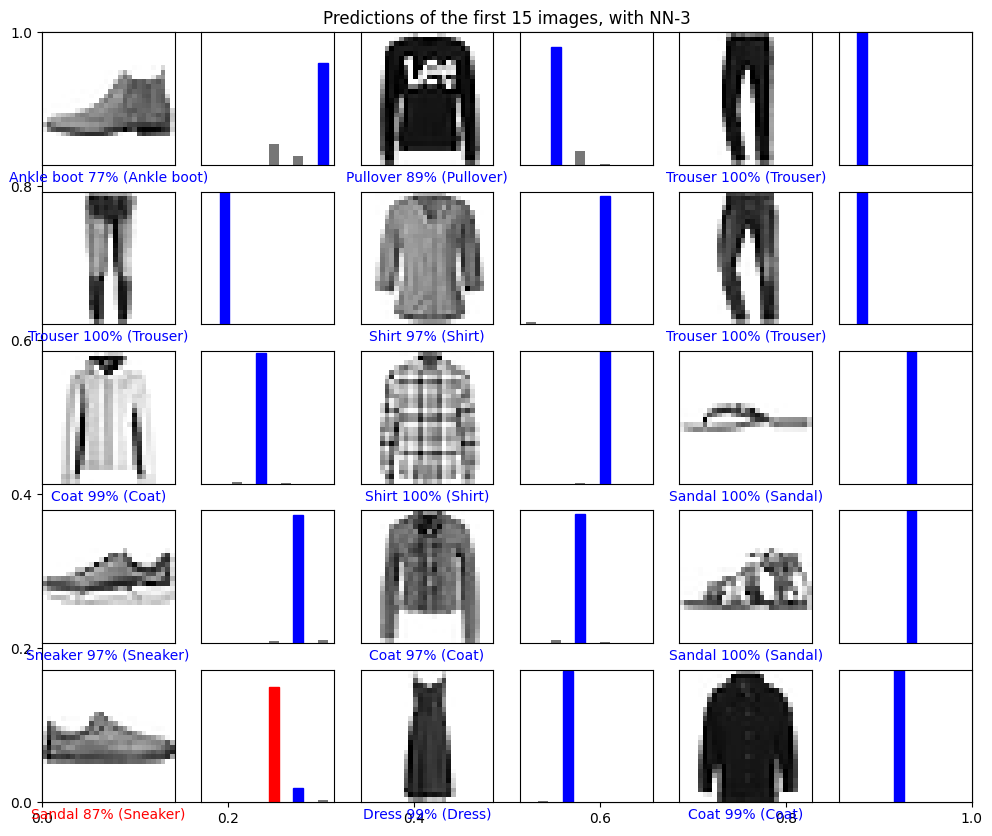

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)